In [ ]:
import json
with open('/content/drive/MyDrive/Sarcasm_Headlines_Dataset.json (1)/Sarcasm_Headlines_Dataset.json','r') as f:
  datastore=[]
  for line in f:
    datastore.append(json.loads(line))
  for item in datastore:
    sentence=item['headline'].lower()
    label=item['is_sarcastic']
    link=item['article_link']

In [ ]:
from bs4 import BeautifulSoup
import string

stopwords=[
    "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "aren't", "as", "at", "be", "because"," been", "before", "being",
     "below", "between", "both", "but", "by", "can't", "cannot", "could", "couldn't"," did", "didn't", "do", "does", "doesn't", "doing", "don't", "down",
      "during", "each", "few", "for", "from", "further", "had", "hadn't", "has", "hasn't", "have", "haven't", "having", "he", "he'd", "he'll", "he's", "her",
     "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "isn't", "it", "it's",
     "its", "itself", "let's", "me", "more", "most", "mustn't", "my", "myself", "no", "nor", "not", "of", "off", "on", "once", "only", "or", "other", "ought", "our",
    "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "shouldn't", "so", "some", "such", "than", "that", "that's",
     "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those",
      "through", "to", "too", "under", "until", "up", "very", "was", "wasn't", "we", "we'd", "we'll", "we're", "we've", "were", "weren't", "what", "what's", "when",
       "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "won't", "would", "wouldn't", "you", "you'd", "you'll",
     "you're", "you've", "your", "yours", "yourself", "yourselves"

]
table=str.maketrans(" "," ",string.punctuation)

In [ ]:
sentences=[]
labels=[]
urls=[]
for item in datastore:
  sentence=item['headline'].lower()
  sentence=sentence.replace(',',' , ')
  sentence=sentence.replace('.',' . ')
  sentence=sentence.replace('-',' - ')
  sentence=sentence.replace('/',' / ')
  soup=BeautifulSoup(sentence)
  sentence=soup.get_text()
  words=sentence.split()
  filtered_sentence=''
  for word in words:
    word= word.translate(table)
    if word not in stopwords:
      filtered_sentence=filtered_sentence + word + " "
  sentences.append(filtered_sentence)
  labels.append(item['is_sarcastic'])
  urls.append(item['article_link'])

<ipython-input-3-021256c11fa7>:10: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup=BeautifulSoup(sentence)


In [ ]:
training_size= 23000
training_sentences=sentences[0:training_size]
testing_sentences=sentences[training_size:]
training_labels=labels[0:training_size]
testing_labels=labels[training_size:]
validation_sentences=testing_sentences[0:1500]
validation_labels=testing_labels[0:1500]
print(len(validation_sentences))

1500


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
vocab_size=20000
max_length=10
trunc_type='post'
oov_token='<OOV>'
tokenizer=Tokenizer(num_words=vocab_size, oov_token=oov_token)
tokenizer.fit_on_texts(training_sentences)
word_index=tokenizer.word_index
training_sequences=tokenizer.texts_to_sequences(training_sentences)
training_padded=pad_sequences(training_sequences, padding='post')
tokenizer.fit_on_texts(testing_sentences)
testing_sequences=tokenizer.texts_to_sequences(testing_sentences)
testing_padded=pad_sequences(testing_sequences, padding='post')
tokenizer.fit_on_texts(validation_sentences)
validation_sequences=tokenizer.texts_to_sequences(validation_sentences)
validation_padded=pad_sequences(validation_sequences, padding='post')
print(word_index)

{'<OOV>': 1, 'new': 2, 'trump': 3, 'man': 4, 'just': 5, 'will': 6, 'one': 7, 'year': 8, 'report': 9, 'area': 10, 'donald': 11, 'day': 12, 'u': 13, 's': 14, 'can': 15, 'says': 16, 'woman': 17, 'first': 18, 'time': 19, 'like': 20, 'get': 21, 'old': 22, 'trumps': 23, 'now': 24, 'life': 25, 'obama': 26, 'people': 27, 'house': 28, 'women': 29, 'white': 30, 'back': 31, 'still': 32, 'make': 33, 'clinton': 34, '5': 35, 'world': 36, 'americans': 37, 'years': 38, 'way': 39, 'family': 40, 'black': 41, 'study': 42, 'gop': 43, 'best': 44, 'bill': 45, 'american': 46, 'school': 47, 'police': 48, 'watch': 49, '3': 50, 'show': 51, 'really': 52, 'president': 53, 'home': 54, 'last': 55, 'video': 56, 'finds': 57, 'death': 58, 'cant': 59, 'know': 60, '10': 61, 'things': 62, 'good': 63, 'going': 64, 'state': 65, 'hillary': 66, 'love': 67, 'nation': 68, 'may': 69, '2': 70, 'health': 71, 'say': 72, 'parents': 73, 'big': 74, 'every': 75, 'right': 76, 'work': 77, '000': 78, 'need': 79, 'dead': 80, 'kids': 81, '

In [ ]:
import numpy as np
training_padded=np.array(training_padded)
training_labels=np.array(training_labels)
testing_padded=np.array(training_padded)
testing_labels=np.array(testing_labels)
validation_padded=np.array(validation_padded)
validation_labels=np.array(validation_labels)

In [ ]:
model=tf.keras.Sequential([
    tf.keras.layers.Embedding(10000, 64),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='relu')
])
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d             │ ?                           │     0 (unbuilt) │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history=model.fit(training_padded,
          training_labels,
          epochs=20,
          )

Epoch 1/20
719/719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5675 - loss: 0.9349
Epoch 2/20
719/719 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8073 - loss: 0.4480
Epoch 3/20
719/719 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8518 - loss: 0.3586
Epoch 4/20
719/719 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8366 - loss: 0.4987
Epoch 5/20
719/719 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7350 - loss: 0.4767
Epoch 6/20
719/719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8785 - loss: 0.3232
Epoch 7/20
719/719 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8736 - loss: 0.5098
Epoch 8/20
719/719 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5622 - loss: 7.0426
Epoch 9/20
719/719 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5575 - loss: 7.1291
Epoch 10/20
719/719 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5728 - loss: 6.7762
Epoch 11/20
719/719 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5804 - loss: 6.1344
Epoch 12/20
719/719 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step

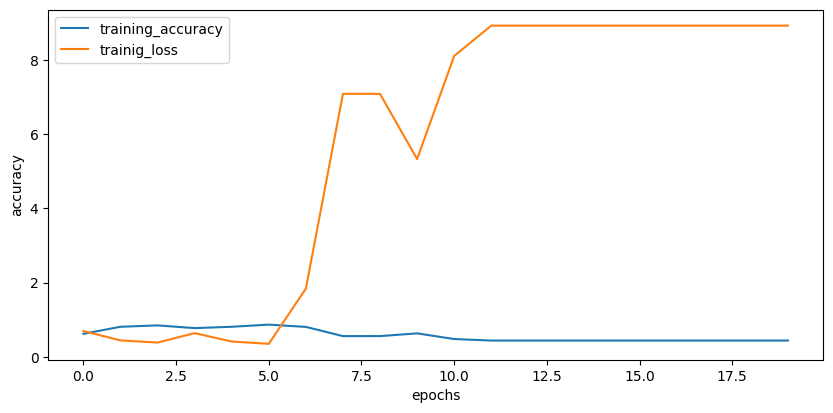

In [ ]:
import matplotlib.pyplot as plt
acc=history.history['accuracy']
loss=history.history['loss']
epochs=20

plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.plot(acc, label='training_accuracy')
plt.plot(loss, label='trainig_loss')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend()
plt.show()


In [ ]:

adam=tf.keras.optimizers.Adam(learning_rate=0.0001,
                              beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(loss='binary_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

In [ ]:
history=model.fit(training_padded,
                  training_labels,
                  epochs=100,
                  validation_data=(validation_padded,validation_labels)
                  )

Epoch 1/100
719/719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4418 - loss: 8.8983 - val_accuracy: 0.4353 - val_loss: 8.9830
Epoch 2/100
719/719 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4421 - loss: 8.8938 - val_accuracy: 0.4353 - val_loss: 8.9830
Epoch 3/100
719/719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4389 - loss: 8.9448 - val_accuracy: 0.4353 - val_loss: 8.9830
Epoch 4/100
719/719 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4388 - loss: 8.9466 - val_accuracy: 0.4353 - val_loss: 8.9830
Epoch 5/100
719/719 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4427 - loss: 8.8839 - val_accuracy: 0.4353 - val_loss: 8.9830
Epoch 6/100
719/719 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4438 - loss: 8.8666 - val_accuracy: 0.4353 - val_loss: 8.9830
Epoch 7/100
719/719 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4368 - loss: 8.9789 - val_accuracy: 0.4353 - val_loss: 8.9830
Epoch 8/100
719/719 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4439 - loss: 8.8663 - val_accu

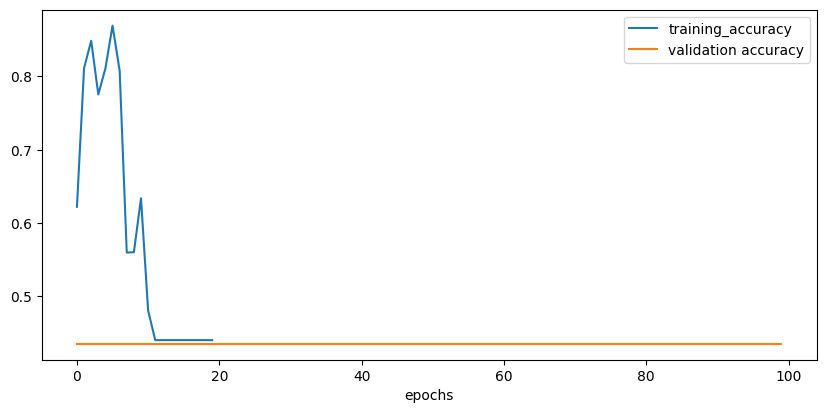

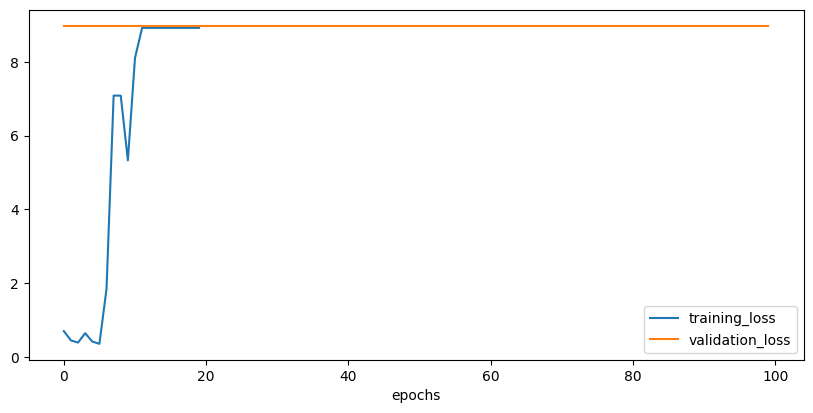

In [ ]:
val_loss=history.history['val_loss']
val_acc=history.history['val_accuracy']
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.plot(acc, label='training_accuracy')
plt.plot(val_acc, label='validation accuracy')
plt.xlabel('epochs')
plt.legend()
plt.show()

plt.figure(figsize=(10,10))
plt.subplot(2,1,2)
plt.plot(loss, label='training_loss')
plt.plot(val_loss, label='validation_loss')
plt.xlabel('epochs')
plt.legend()
plt.show()

In [ ]:
wc=tokenizer.word_counts
print(wc)

OrderedDict([('former', 115), ('versace', 1), ('store', 60), ('clerk', 11), ('sues', 21), ('secret', 96), ('black', 290), ('code', 19), ('minority', 17), ('shoppers', 4), ('roseanne', 3), ('revival', 11), ('catches', 15), ('thorny', 3), ('political', 87), ('mood', 13), ('better', 133), ('worse', 41), ('mom', 214), ('starting', 49), ('fear', 50), ('sons', 37), ('web', 20), ('series', 64), ('closest', 7), ('thing', 152), ('will', 585), ('grandchild', 2), ('boehner', 27), ('just', 613), ('wants', 145), ('wife', 89), ('listen', 25), ('come', 107), ('alternative', 13), ('debt', 29), ('reduction', 4), ('ideas', 45), ('j', 50), ('k', 51), ('rowling', 8), ('wishes', 45), ('snape', 2), ('happy', 70), ('birthday', 65), ('magical', 35), ('way', 276), ('advancing', 2), ('worlds', 100), ('women', 344), ('fascinating', 5), ('case', 98), ('eating', 79), ('lab', 8), ('grown', 19), ('meat', 29), ('ceo', 81), ('send', 35), ('kids', 211), ('school', 258), ('work', 197), ('company', 101), ('top', 133), ('

In [ ]:
from collections import OrderedDict
newlist=(OrderedDict(sorted(wc.items(), key=lambda t:t[1], reverse=True)))
print(newlist)

OrderedDict([('new', 1599), ('trump', 1365), ('man', 1350), ('just', 613), ('will', 585), ('one', 562), ('report', 545), ('year', 537), ('area', 520), ('donald', 498), ('u', 497), ('day', 491), ('s', 489), ('says', 481), ('woman', 470), ('can', 468), ('time', 464), ('first', 457), ('like', 424), ('get', 420), ('trumps', 419), ('old', 410), ('people', 403), ('life', 394), ('obama', 378), ('now', 377), ('house', 376), ('make', 359), ('white', 354), ('still', 347), ('women', 344), ('back', 344), ('clinton', 330), ('world', 310), ('5', 310), ('years', 306), ('family', 296), ('black', 290), ('americans', 281), ('way', 276), ('american', 267), ('gop', 260), ('school', 258), ('study', 256), ('bill', 256), ('best', 253), ('3', 251), ('police', 245), ('last', 243), ('show', 243), ('watch', 242), ('really', 241), ('cant', 237), ('know', 234), ('home', 234), ('death', 232), ('10', 232), ('things', 229), ('good', 229), ('state', 229), ('health', 228), ('president', 228), ('2', 228), ('nation', 226

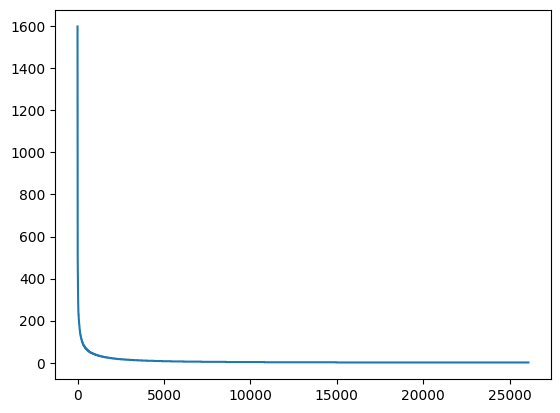

In [ ]:
xs=[]
ys=[]
curr_x=1
for item in newlist:
  xs.append(curr_x)
  curr_x=curr_x + 1
  ys.append(newlist[item])
plt.plot(xs,ys)
#plt.axis([300,10000,0,100])
plt.show()

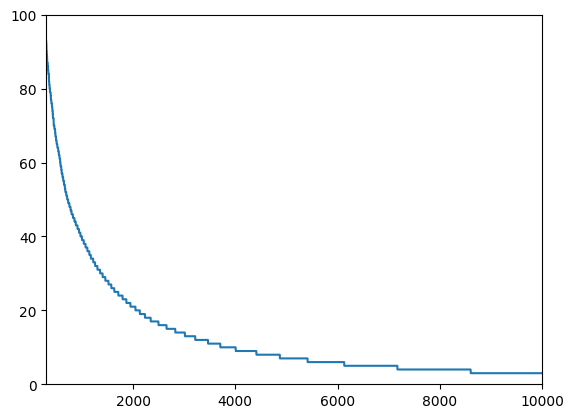

In [ ]:
xs=[]
ys=[]
curr_x=1
for item in newlist:
  xs.append(curr_x)
  curr_x=curr_x + 1
  ys.append(newlist[item])
plt.plot(xs,ys)
plt.axis([300,10000,0,100])
plt.show()

In [ ]:
model=tf.keras.Sequential([
    tf.keras.layers.Embedding(20000, 64),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='relu')
])
adam=tf.keras.optimizers.Adam(learning_rate=0.0001,
                              beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(loss='binary_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])


In [ ]:
history=model.fit(training_padded,
                  training_labels,
                  epochs=100,
                  validation_data=(validation_padded,validation_labels)
                  )

Epoch 1/100
719/719 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9740 - loss: 0.0828 - val_accuracy: 0.5407 - val_loss: 5.3166
Epoch 2/100
719/719 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9765 - loss: 0.0710 - val_accuracy: 0.5460 - val_loss: 5.3481
Epoch 3/100
719/719 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9773 - loss: 0.0712 - val_accuracy: 0.5427 - val_loss: 5.4212
Epoch 4/100
719/719 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9764 - loss: 0.0820 - val_accuracy: 0.5420 - val_loss: 5.3973
Epoch 5/100
719/719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9790 - loss: 0.0723 - val_accuracy: 0.5440 - val_loss: 5.3999
Epoch 6/100
719/719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9813 - loss: 0.0820 - val_accuracy: 0.5420 - val_loss: 5.5095
Epoch 7/100
719/719 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9833 - loss: 0.0599 - val_accuracy: 0.5433 - val_loss: 5.5533
Epoch 8/100
719/719 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9810 - loss: 0.0699 - val_accu

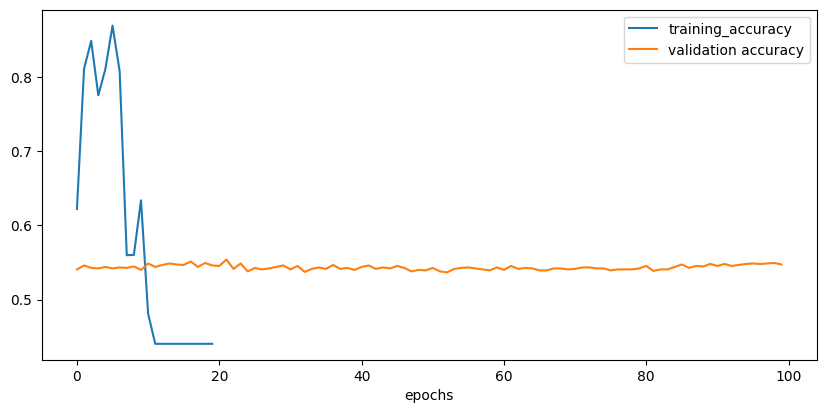

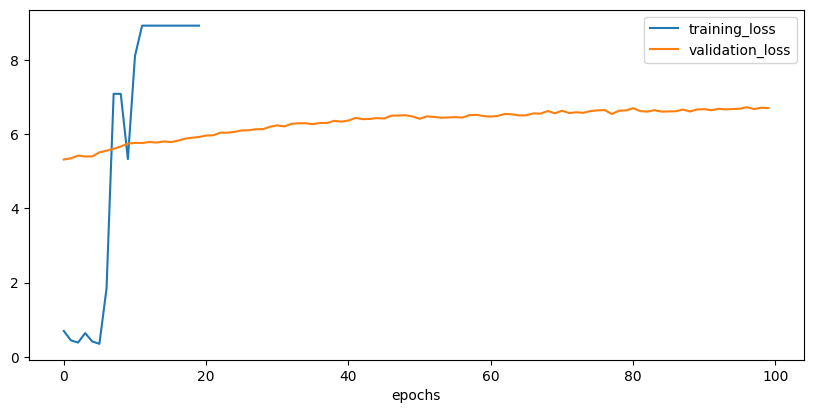

In [ ]:
val_loss=history.history['val_loss']
val_acc=history.history['val_accuracy']
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.plot(acc, label='training_accuracy')
plt.plot(val_acc, label='validation accuracy')
plt.xlabel('epochs')
plt.legend()
plt.show()

plt.figure(figsize=(10,10))
plt.subplot(2,1,2)
plt.plot(loss, label='training_loss')
plt.plot(val_loss, label='validation_loss')
plt.xlabel('epochs')
plt.legend()
plt.show()

In [ ]:
model=tf.keras.Sequential([
    tf.keras.layers.Embedding(2000, 7),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='relu')
])
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
history=model.fit(training_padded,
                  training_labels,
                  epochs=100,
                  validation_data=(validation_padded,validation_labels)
                  )

Epoch 1/100
719/719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5537 - loss: 0.8020 - val_accuracy: 0.5633 - val_loss: 0.7037
Epoch 2/100
719/719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7094 - loss: 0.5780 - val_accuracy: 0.5407 - val_loss: 1.9029
Epoch 3/100
719/719 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7605 - loss: 0.4981 - val_accuracy: 0.5380 - val_loss: 1.6006
Epoch 4/100
719/719 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7716 - loss: 0.4813 - val_accuracy: 0.5387 - val_loss: 1.9254
Epoch 5/100
719/719 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7816 - loss: 0.4508 - val_accuracy: 0.5373 - val_loss: 1.7677
Epoch 6/100
719/719 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7752 - loss: 0.4573 - val_accuracy: 0.5333 - val_loss: 2.0860
Epoch 7/100
719/719 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7846 - loss: 0.4431 - val_accuracy: 0.5333 - val_loss: 2.0611
Epoch 8/100
719/719 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7823 - loss: 0.4554 - val_accu

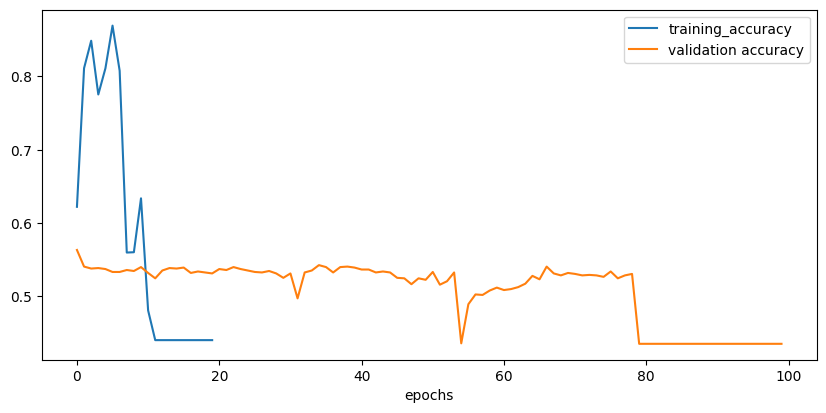

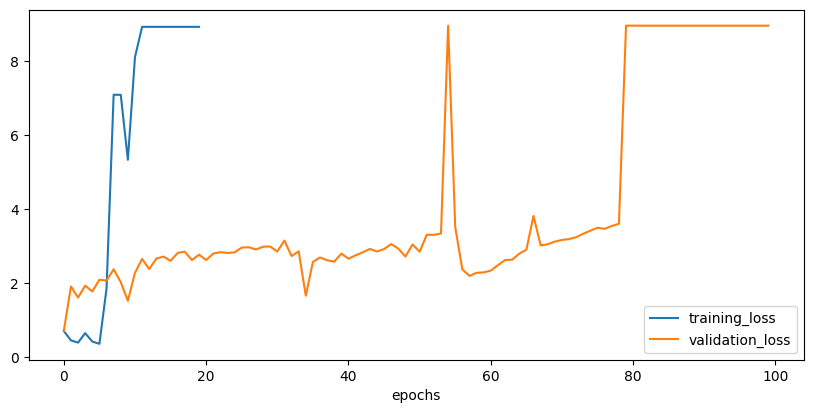

In [ ]:
val_loss=history.history['val_loss']
val_acc=history.history['val_accuracy']
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.plot(acc, label='training_accuracy')
plt.plot(val_acc, label='validation accuracy')
plt.xlabel('epochs')
plt.legend()
plt.show()

plt.figure(figsize=(10,10))
plt.subplot(2,1,2)
plt.plot(loss, label='training_loss')
plt.plot(val_loss, label='validation_loss')
plt.xlabel('epochs')
plt.legend()
plt.show()

In [ ]:
model=tf.keras.Sequential([
    tf.keras.layers.Embedding(2000, 7),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='relu')
])
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
history=model.fit(training_padded,
                  training_labels,
                  epochs=100,
                  validation_data=(validation_padded,validation_labels)
                  )

Epoch 1/100
719/719 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.5615 - loss: 7.0673 - val_accuracy: 0.5653 - val_loss: 6.9990
Epoch 2/100
719/719 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5599 - loss: 7.0944 - val_accuracy: 0.5653 - val_loss: 6.9990
Epoch 3/100
719/719 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5651 - loss: 7.0095 - val_accuracy: 0.5653 - val_loss: 6.9990
Epoch 4/100
719/719 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5637 - loss: 7.0329 - val_accuracy: 0.5653 - val_loss: 6.9990
Epoch 5/100
719/719 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5543 - loss: 7.1839 - val_accuracy: 0.5653 - val_loss: 6.9990
Epoch 6/100
719/719 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5616 - loss: 7.0669 - val_accuracy: 0.5653 - val_loss: 6.9990
Epoch 7/100
719/719 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5599 - loss: 7.0932 - val_accuracy: 0.5653 - val_loss: 6.9990
Epoch 8/100
719/719 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5629 - loss: 7.0454 - val_accu

In [ ]:
model = tf.keras.Sequential([
 tf.keras.layers.Embedding(2000, 7),
 tf.keras.layers.GlobalAveragePooling1D(),
 tf.keras.layers.Dense(8, activation='relu'),
 tf.keras.layers.Dropout(.25),
 tf.keras.layers.Dense(1, activation='sigmoid')
])


In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
history=model.fit(training_padded,
                  training_labels,
                  epochs=100,
                  validation_data=(validation_padded,validation_labels)
                  )

Epoch 1/100
719/719 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.5560 - loss: 0.6844 - val_accuracy: 0.5720 - val_loss: 0.6765
Epoch 2/100
719/719 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6132 - loss: 0.6497 - val_accuracy: 0.5627 - val_loss: 0.6936
Epoch 3/100
719/719 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7269 - loss: 0.5457 - val_accuracy: 0.5453 - val_loss: 0.7960
Epoch 4/100
719/719 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7544 - loss: 0.5091 - val_accuracy: 0.5327 - val_loss: 0.8910
Epoch 5/100
719/719 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7570 - loss: 0.5010 - val_accuracy: 0.5427 - val_loss: 0.9108
Epoch 6/100
719/719 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7539 - loss: 0.5092 - val_accuracy: 0.5273 - val_loss: 0.9459
Epoch 7/100
719/719 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7615 - loss: 0.5016 - val_accuracy: 0.5273 - val_loss: 0.9754
Epoch 8/100
719/719 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7645 - loss: 0.4971 - val_accu

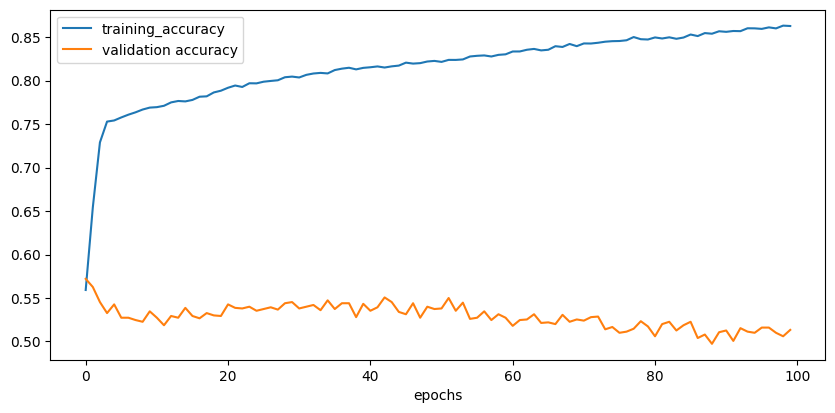

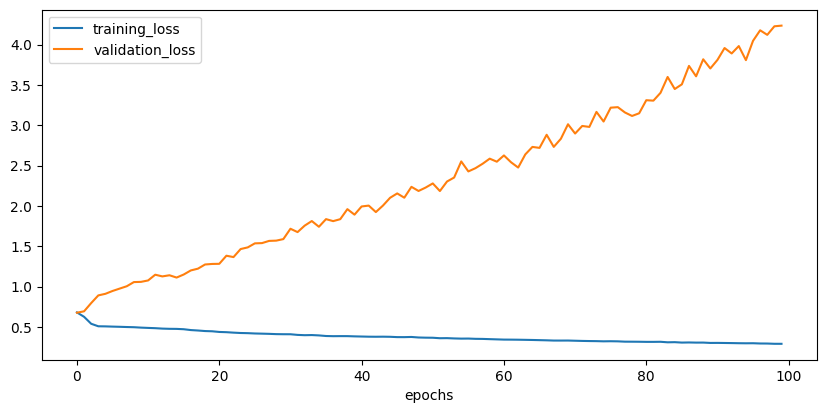

In [ ]:
val_loss=history.history['val_loss']
val_acc=history.history['val_accuracy']
acc=history.history['accuracy']
loss=history.history['loss']
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.plot(acc, label='training_accuracy')
plt.plot(val_acc, label='validation accuracy')
plt.xlabel('epochs')
plt.legend()
plt.show()

plt.figure(figsize=(10,10))
plt.subplot(2,1,2)
plt.plot(loss, label='training_loss')
plt.plot(val_loss, label='validation_loss')
plt.xlabel('epochs')
plt.legend()
plt.show()

In [ ]:
model=tf.keras.Sequential([
    tf.keras.layers.Embedding(2000,7),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(8, activation='relu',
                         kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
history=model.fit(training_padded,
                  training_labels,
                  epochs=100,
                  validation_data=(validation_padded,validation_labels)
                  )

Epoch 1/100
719/719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5581 - loss: 0.7229 - val_accuracy: 0.5653 - val_loss: 0.6844
Epoch 2/100
719/719 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5591 - loss: 0.6809 - val_accuracy: 0.5887 - val_loss: 0.6829
Epoch 3/100
719/719 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6707 - loss: 0.6384 - val_accuracy: 0.5507 - val_loss: 0.7193
Epoch 4/100
719/719 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7529 - loss: 0.5651 - val_accuracy: 0.5427 - val_loss: 0.7903
Epoch 5/100
719/719 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7647 - loss: 0.5341 - val_accuracy: 0.5413 - val_loss: 0.8384
Epoch 6/100
719/719 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7713 - loss: 0.5124 - val_accuracy: 0.5367 - val_loss: 0.8818
Epoch 7/100
719/719 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7752 - loss: 0.4999 - val_accuracy: 0.5353 - val_loss: 0.9126
Epoch 8/100
719/719 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7805 - loss: 0.4891 - val_accu

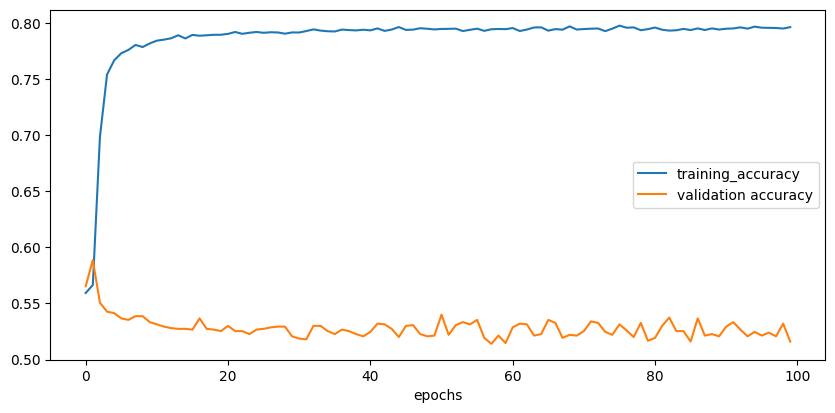

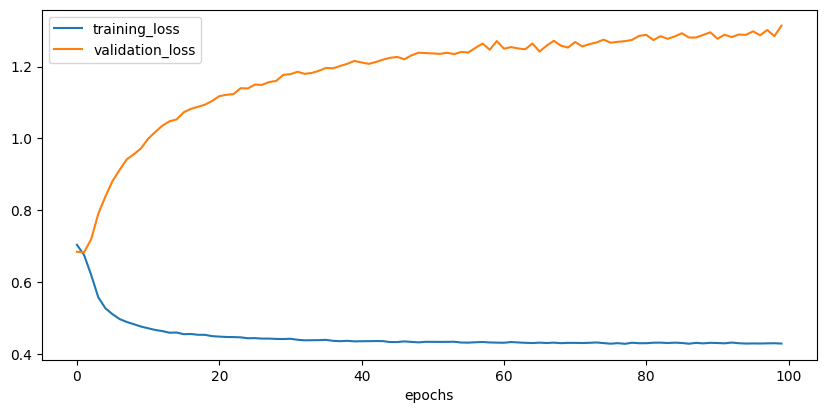

In [ ]:
val_loss=history.history['val_loss']
val_acc=history.history['val_accuracy']
acc=history.history['accuracy']
loss=history.history['loss']
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.plot(acc, label='training_accuracy')
plt.plot(val_acc, label='validation accuracy')
plt.xlabel('epochs')
plt.legend()
plt.show()

plt.figure(figsize=(10,10))
plt.subplot(2,1,2)
plt.plot(loss, label='training_loss')
plt.plot(val_loss, label='validation_loss')
plt.xlabel('epochs')
plt.legend()
plt.show()

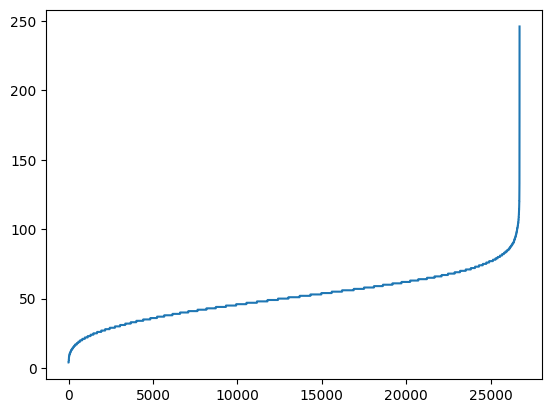

In [ ]:
xs=[]
ys=[]
current_item=1
for item in sentences:
  xs.append(current_item)
  current_item=current_item + 1
  ys.append(len(item))
newys=sorted(ys)

plt.plot(xs, newys)
plt.show()

In [ ]:
sentences=['granny starting to fear spiders in the garden might be real',
           'game of thrones season finale showing this sunday night',
           'tensorflow book will be a best seller'
           ]

sequences=tokenizer.texts_to_sequences(sentences)
print(sequences)

[[1, 732, 1, 712, 1, 1, 1, 2612, 276, 1, 100], [126, 1, 1375, 186, 3006, 2564, 1, 1616, 151], [1, 214, 6, 1, 1, 47, 16909]]


In [ ]:
padded=pad_sequences(sequences, maxlen=100, padding='post',
                     truncating=trunc_type)
print(padded)

[[    1   732     1   712     1     1     1  2612   276     1   100     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0]
 [  126     1  1375   186  3006  2564     1  1616   151     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0    

In [ ]:
print(model.predict(padded))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
[[0.70705956]
 [0.2721762 ]
 [0.38522726]]


In [ ]:
reverse_word_index=dict([(value, key)
for (key, value) in word_index.items()])

In [ ]:
e= model.layers[0]
weights=e.get_weights()[0]
print(weights.shape)

(2000, 7)


In [ ]:
print(reverse_word_index[2])
print(weights[2])

new
[-0.6180668  -0.3671445  -0.5728201   0.46850234 -0.74735266 -0.82624644
 -0.86642456]


In [ ]:
import io

out_v=io.open('vecs.tsv', 'w', encoding='utf-8')
out_m=io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range (1, 2000):
  word=reverse_word_index[word_num]
  embeddings=weights[word_num]
  out_m.write(word + '\n')
  out_v.write ('\t'.join([str(x) for x in embeddings]) + '\n')
out_v.close()
out_m.close()

In [ ]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
training_size = 24000
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]


In [ ]:
import tensorflow_hub as hub
hub_layer=hub.KerasLayer(
   'https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1',
   output_shape=[20], input_shape=[],
   dtype=tf.string, trainable=False
)

In [ ]:
model= tf.keras.Sequential([
    hub_layer,
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

adam=tf.keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9,
                              beta_2=0.999, amsgrad=False)

model.compile(loss='binary_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

ValueError: Only instances of `keras.Layer` can be added to a Sequential model. Received: <tensorflow_hub.keras_layer.KerasLayer object at 0x78f532384160> (of type <class 'tensorflow_hub.keras_layer.KerasLayer'>)